<a href="https://www.datamics.com/courses/online-courses/">![title](bg_datamics_top.png)</a><center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://www.datamics.com/courses/online-courses/'>www.datamics.com</a></em>

# Decision Trees und Random Forests Projekt - Aufgaben

Für dieses Projekt werden wir öffentlich verfügbare Daten von [LendingClub.com](https://de.wikipedia.org/wiki/Lending_Club) verwenden. Lending Club bringt Leute zusammen, die Geld brauchen (Leihende) und solche, die Geld investieren möchten (Geldgeber). Als Invester möchte man dann verständlicherweise vor allem an die Leute sein Geld verleihen, die es mit einer hohen Wahrscheinlichkeit zurückzahlen. Wir werden versuchen ein Modell zu erstellen, dass bei dieser Vorhersage hilft.

Wir werden Daten von 2007 bis 2010 verwenden, bevor das Unternehmen an die Börse ging. Anhand der Daten werden wir versuchen vorherzusagen, ob ein Leihender das Geld zurückgezahlt hat oder nicht. Die Daten haben wir als CSV in den Kursunterlagen beigefügt. Diese Datei wurde bereits um die nicht verfügbaren Einträge gesäubert.

Schauen wir uns noch die verfügbaren Spalten an:

* credit.policy: 1 falls der Kunde die Risikobewertung besteht, 0 falls nicht.
* purpose: Der Zweck des Kreidts (Werte sind "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", und "all_other").
* int.rate: Der Zinssatz des Kreidts als Anteil (eine Rate von 11% würde 0.11 sein). Kreditnehmer, die LendingClub.com als riskanter einstuft erhalten einen höheren Zins.
* installment: Die monatliche Zeilzahlung, die der Kreditnehmer leistet, wenn der Kredit finaziert wird.
* log.annual.inc: Der natürliche Log des angegebenen jährlichen Einkommens des Kreditnehmers.
* dti: Die "debt-to-income" Rate des Kreditnehmers (Kredit geteilt durch jährliches Einkommen.
* fico: Der FICO Kreditscore des Kreditnehmers.
* days.with.cr.line: Anzahl der Tage an denen der Kunde einen Dispokredit hatte.
* revol.bal: Die Bilanz am Ende eines Kreditkartenabrechnungszeitraums.
* revol.util: Der erstattete Anteil am Gesamtkredit.
* inq.last.6mths: Die Anzahl an Anfragen, die Kreditgeber in den letzten 6 Monaten an den Kreditnehmer gestellt haben.
* delinq.2yrs: Die Anzahl der Vorkommnisse eines Verzugs von über 30 Tagen innerhalb der letzten 2 Jahre.
* pub.rec:  Die Anzahl an negativen Einträgen (Bankrott, Steuerverzug, Verurteilungen,...) des Kreditnehmers.

## Libraries importieren

**Importiere die üblichen Libraries für Pandas und zur Visualisierung. Sklearn können wir später noch importieren.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten laden

**Nutze Pandas, um die Datei "loan_data.csv" als DataFrame namens "loans" zu laden.**

In [2]:
loans = pd.read_csv('Loan_Data.csv')

**Schau dir die info(), head() und describe() Methoden für loans an.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


=> not.fully.paid ist Zielvariable

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Explorative Daten Analyse

Visualisieren wir nun einige Daten! Wie nutzen dazu Seaborn und Pandas eingebaute VIsualisierungsfähigkeiten. Wer möchte kann aber auch andere Methoden verwenden. Die Farben müssen z.B. nicht genau übereinstimmen. Es geht hier darum ein Verständnis für die Daten zu entwickeln!

**Erstelle ein Histogram zweier FICO Verteilungen übereinandern, je eins nach dem credit.policy Ergebnis.**

*Hinweis: Das ist bereits etwas knifflig. Keine Sorge, die Lösung hilft im Zweifelsfall weiter! Meine Empfehlung ist die Verwendung von Pandas .hist() Funktion.*

In [27]:
loans[loans['credit.policy'] == 1] # Nur DF anzeigen, wo 1 ist

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,home_improvement,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,1
7706,1,small_business,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,1
7707,1,all_other,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,1
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1


In [31]:
loans[loans['credit.policy'] == 1]['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
7705    742
7706    697
7707    737
7708    717
7709    757
Name: fico, Length: 7710, dtype: int64

Text(0.5, 0, 'FICO')

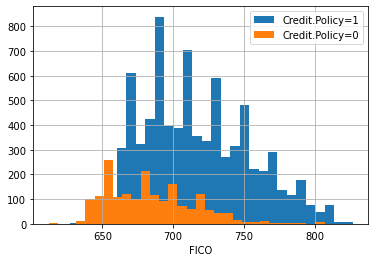

In [22]:
# Code hier
loans.loc[loans['credit.policy'] == 1]['fico'].hist(bins=30, label='Credit.Policy=1')  
# Spalte credit.policy auswählen, wo 1 ist und das auf FICO
loans[loans['credit.policy'] == 0]['fico'].hist(bins=30, label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')

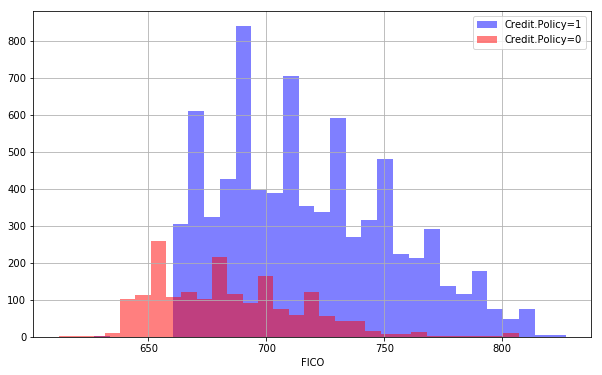

**Erstelle ein gleiches Diagramm, dass diesesmal nach der "not.fully.paid" Spalte trennt.**

Text(0.5, 0, 'FICO')

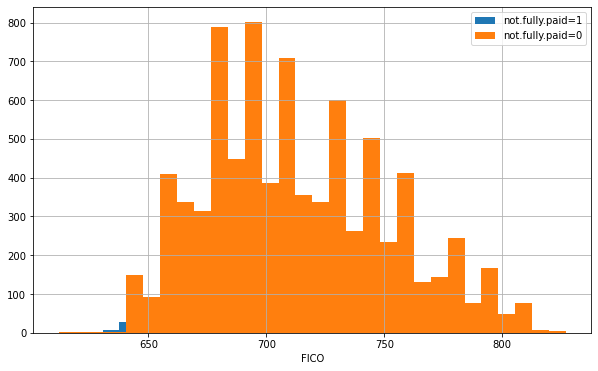

In [36]:
# Code hier
plt.figure(figsize=(10,6))
loans.loc[loans['not.fully.paid'] == 1]['fico'].hist(bins=30, label='not.fully.paid=1')  
# Spalte credit.policy auswählen, wo 1 ist und das auf FICO
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins=30, label='not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')

=> Die meisten haben zurückgezahlt.

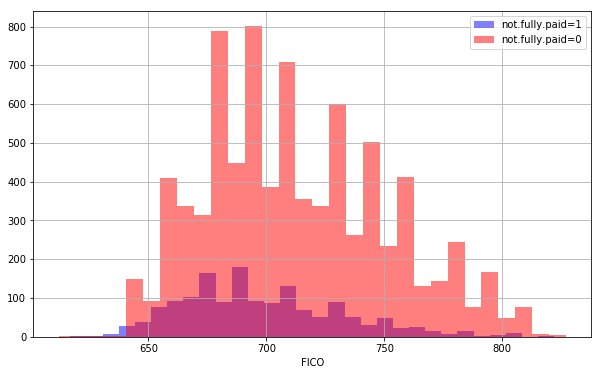

**Erstelle ein Countplot unter Verwendung von Seaborn, das die Anzahl der Leihgaben (en. loans) nach Zweck (en. purpose) anzeigt. Der Hue soll dabei durch die Spalte "not.fully.paid" definiert sein.**

<AxesSubplot:xlabel='purpose', ylabel='count'>

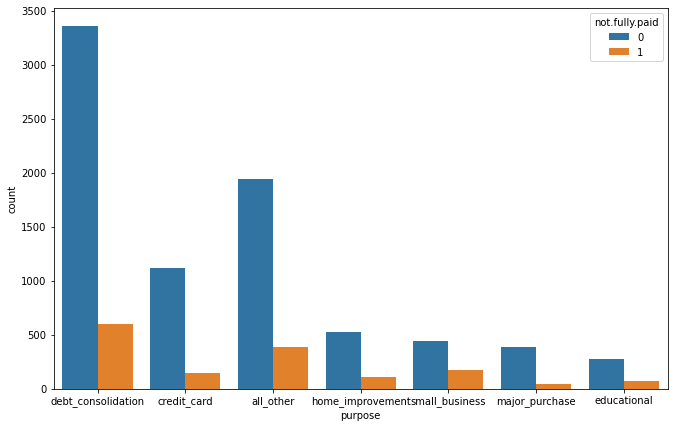

In [35]:
# Code hier
plt.figure(figsize=(11,7))
sns.countplot(x="purpose", data=loans, hue="not.fully.paid")

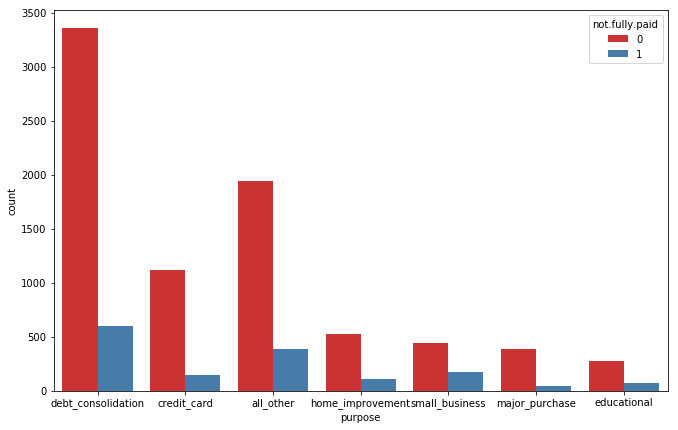

**Lasst uns den Trend zwischen FICO Score und den Zinsen (en. interest rate) betrachten. Stelle dazu das folgende Jointplot nach.**

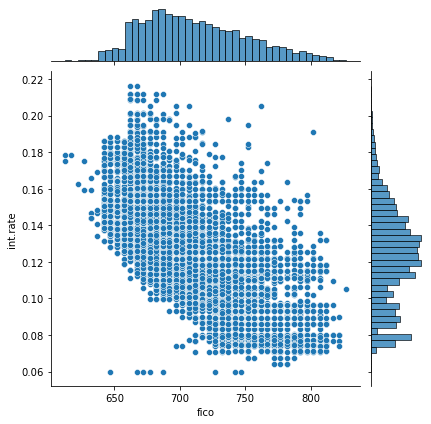

In [38]:
# Code hier
sns.jointplot(data=loans, x="fico", y="int.rate")

**Erstelle die folgenden lmplots, um zu sehen, ob sich der Trend zwischen "not.fully.paid" und "credit.policy" unterscheidet. Schau in die Dokumentation von lmplot, wenn du nicht mehr weißt, wie man in zwei Spalten aufteilt.**

<Figure size 792x504 with 0 Axes>

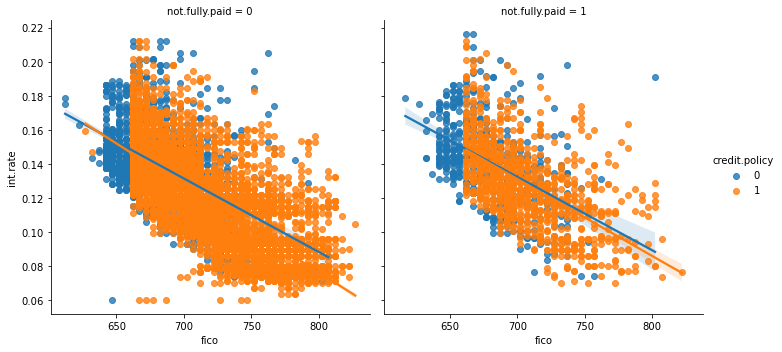

In [43]:
# Code hier
plt.figure(figsize=(11,7))
sns.lmplot(x="fico", y="int.rate", col="not.fully.paid", data=loans, hue="credit.policy")

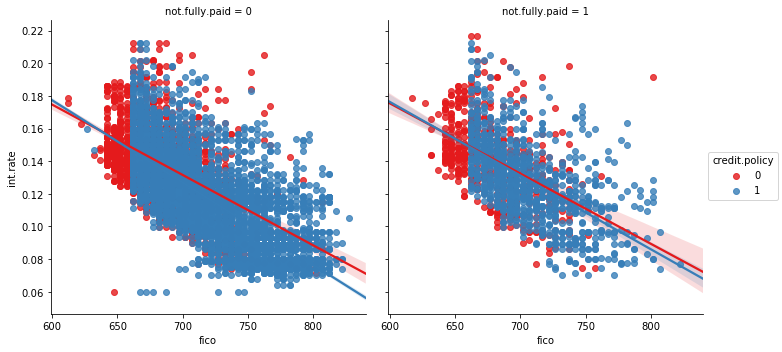

## Die Daten vorbereiten

Bereiten wir unsere Daten nun für ein Random Forest Klassifikationsmodell vor!

**Schaue dir erneut loans.info() an.**

In [44]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Kategorische Eigenschaften

Achte darauf, dass die Spalte "purpose" (dt. Zweck) kategorisch ist. Das bedeutet wir müssen sie in Dummy-Variablen umwandeln, damit sklearn mit ihnen arbeiten kann. Für diesen Schritt verwenden wir `pd.get_dummies`.

Dieses Vorgehen kann auf weitere kategorische Inhalte angewendet werden, wenn es nötig sein sollte.

**Erstelle eine Liste, die nur ein Element enthält. Dieses Element soll der String "purpose" sein. Nenne diese Liste cat_feats.**

In [47]:
cat_feats = ['purpose']
cat_feats

['purpose']

In [50]:
dummy = pd.get_dummies(loans['purpose'])
# Convert Categorical Features into dummy indicator
dummy # Purposes (all_other, credit_card, etc.)

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0
9574,1,0,0,0,0,0,0
9575,0,0,1,0,0,0,0
9576,0,0,0,0,1,0,0


**Nutze jetzt pd.get_dummies(loans,columns=cat_feats,drop_first=True), um einen korrigierten und größeren DataFrame zu erstellen. Nenne diesen DataFrame final_data.**

*Hinweis: Um mehrere kategorische Eigenschaften in Dummy-Variablen zu übertragen füge die entsprechenden Spalten einfach der Liste aus dem vorherigen Arbeitsschritt hinzu. Für unseren Datensatz hier müssen wir allerdings keine weitere Spalte berücksichtigen.*

In [63]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)  
# drop_first=True um all_other auszuschließen

In [64]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Jetzt ist es an der Zeit unsere Daten aufzuteilen. 

**Nutze sklearn um unsere Daten in Trainings- und Testset aufzuteilen. Diesen Vorgang kennst du schon aus vorherigen Abschnitten.**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = final_data.drop('not.fully.paid',axis=1) # Ganzes DF, außer not.fully.paid
y = final_data['not.fully.paid'] # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [84]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

## Ein Entscheidungsbaummodell trainieren

Beginnen wir damit einen einfachen Entscheidungsbaum zu trainieren!

**Importiere den DecisionTreeClassifier**

In [58]:
from sklearn.tree import DecisionTreeClassifier

**Erstelle eine Instanz des DecisionTreeClassifier() namens dtree und fitte die Trainingsdaten darauf.**

In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Vorhersage und Auswertung

**Erstelle die Vorhersagen (en. predictions) aus den Testdaten und werte dann Classification Report und Confusion Matrix aus.**

In [65]:
predictions = dtree.predict(X_test)

In [85]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



Not Fully Paid = 0 -> Er hat alles zurückgezahlt  
Relativ hohe Wahrscheinlichkeit vorherzusagen, ob jemand zurückzahlt.  
Jedoch hat das Modell beim vorhersagen, ob jemand nicht zurückzahlt Schwierigkeiten

In [68]:
print(confusion_matrix(y_test,predictions))

[[1995  436]
 [ 335  108]]


## Ein Random Forest Modell trainieren

Jetzt trainieren wir ein ganzes Modell!

**Erstelle eine Instanz des RandomForestClassifier und fitte die Trainignsdaten aus unserem vorherigen Schritt darauf.**

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=600)

In [79]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Vorhersage und Auswertung

Jetzt können wir für y_test Werte vorhersagen und das Ergebnis auswerten.

**Sage die Klasse von not.fully.paid für die X_test Daten vorher.**

In [80]:
y_pred = rfc.predict(X_test)

**Erstelle jetzt einen Classification Report aus den Ergebnissen. Erhälst du etwas komisches oder eine Art Warnung?**

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



**Zeige jetzt noch die Confusion Matrix der Vorhersagen an.**

In [83]:
print(confusion_matrix(y_test,predictions))

[[1995  436]
 [ 335  108]]


**Welche Methode hat besser performt?**

In [31]:
# Antwort

# Gut gemacht!